# 政府工作报告文本挖掘

In [78]:
with open('/Users/chengjun/github/cjc2016/data/gov_reports1954-2016.txt', 'r') as f:
    reports = f.readlines()

In [79]:
len(reports)

47

In [86]:
print reports[32][:1000]

2002	2002年政府工作报告　　——2002年3月5日在第九届全国人民代表大会第五次会议上		　　　　　　　　　　　　　　　　　　 国务院总理朱镕基　  各位代表：　　现在，我代表国务院向大会作政府工作报告，请予审议，并请全国政协各位委员提出意见。　　首先报告２００１年的工作。　　新世纪第一年，全国各族人民在中国共产党领导下，面对复杂多变的国际形势，克服困难，阔步前进，改革开放和社会主义现代化建设取得了新的重大成就。　　国民经济保持良好发展势头。在世界经济增长明显减速的情况下，我们坚持扩大内需的方针，坚定地实施积极的财政政策和稳健的货币政策，实现了经济较快增长。２００１年国内生产总值达到９５９３３亿元，比上年增长７．３％。经济结构调整取得积极进展。农业结构有所优化，优质、专


In [99]:
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import sys 
import numpy as np
from collections import defaultdict
import statsmodels.api as sm
from wordcloud import WordCloud
import jieba
import matplotlib
import gensim
from gensim import corpora, models, similarities
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #指定默认字体 
matplotlib.rc("savefig", dpi=400)

In [107]:
filename = '/Users/chengjun/github/cjc2016/data/stopwords.txt'
stopwords = {}
f = open(filename, 'r')
line = f.readline().rstrip()
while line:
    stopwords.setdefault(line, 0)
    stopwords[line.decode('utf-8')] = 1
    line = f.readline().rstrip()
f.close()


In [114]:
def wordcloudplot(txt, year):
    wordcloud = WordCloud(font_path='/Users/chengjun/github/cjc2016/data/msyh.ttf').generate(txt)
    # Open a plot of the generated image.
    plt.imshow(wordcloud)
    plt.title(year)
    plt.axis("off")
    #plt.show()

In [110]:
adding_stopwords = [u'我们', u'要', u'地', u'有', u'这', u'人',
                    u'发展',u'建设',u'加强',u'继续',u'对',u'等',u'推进',u'工作',u'增加']
for s in adding_stopwords: stopwords[s]=10

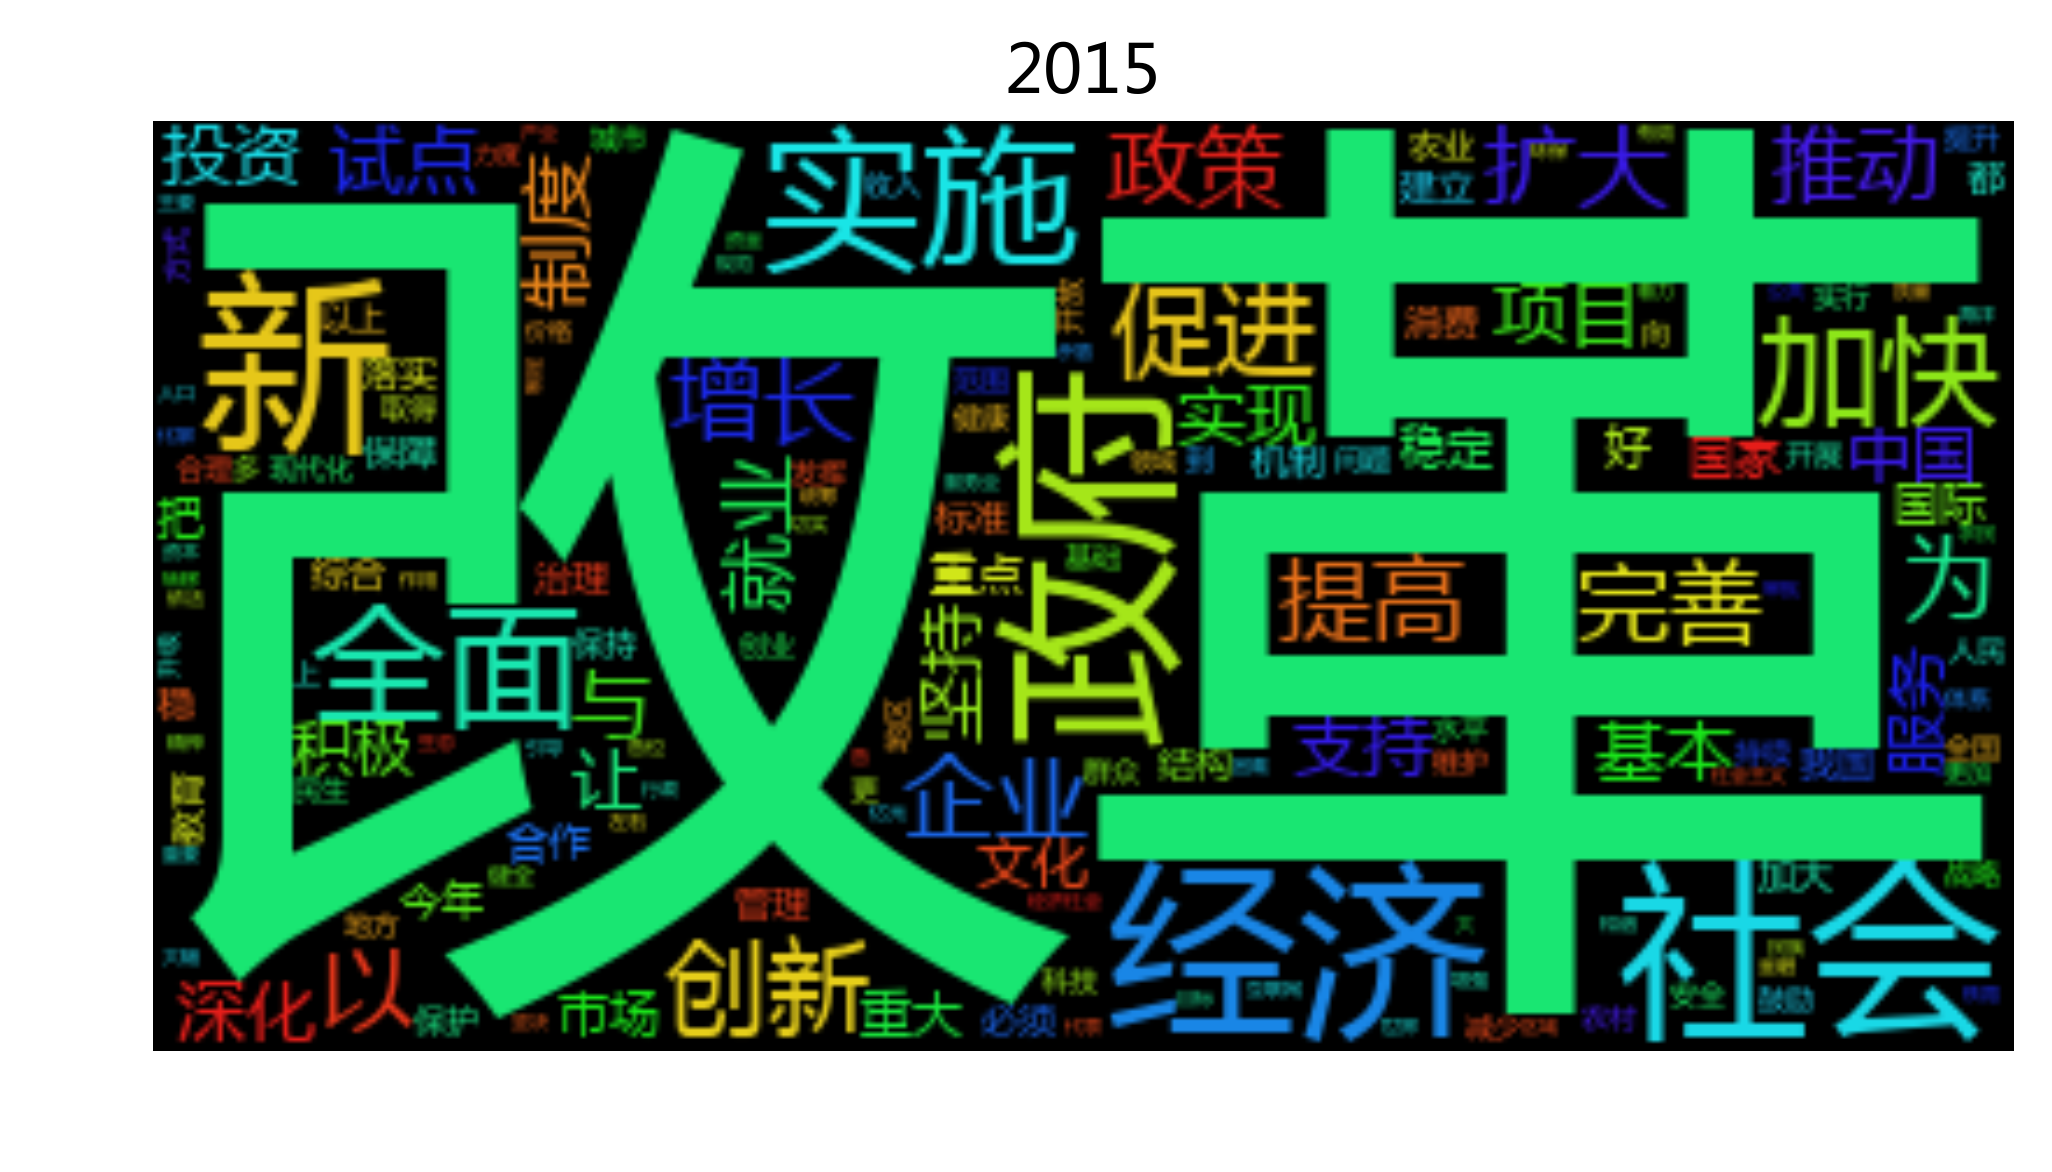

In [111]:
#jieba.add_word('股灾', freq=100, tag=None) 

txt = reports[-2]
seg_list = jieba.cut(txt, cut_all=False)
seg_list = [i for i in seg_list if i not in stopwords]
txt = r' '.join(seg_list)
wordcloudplot(txt, txt[:4]) 
#file_path = '/Users/chengjun/GitHub/cjc2016/figures/wordcloud-' + txt[:4] + '.png'
#plt.savefig(file_path,dpi = 300, bbox_inches="tight",transparent = True)

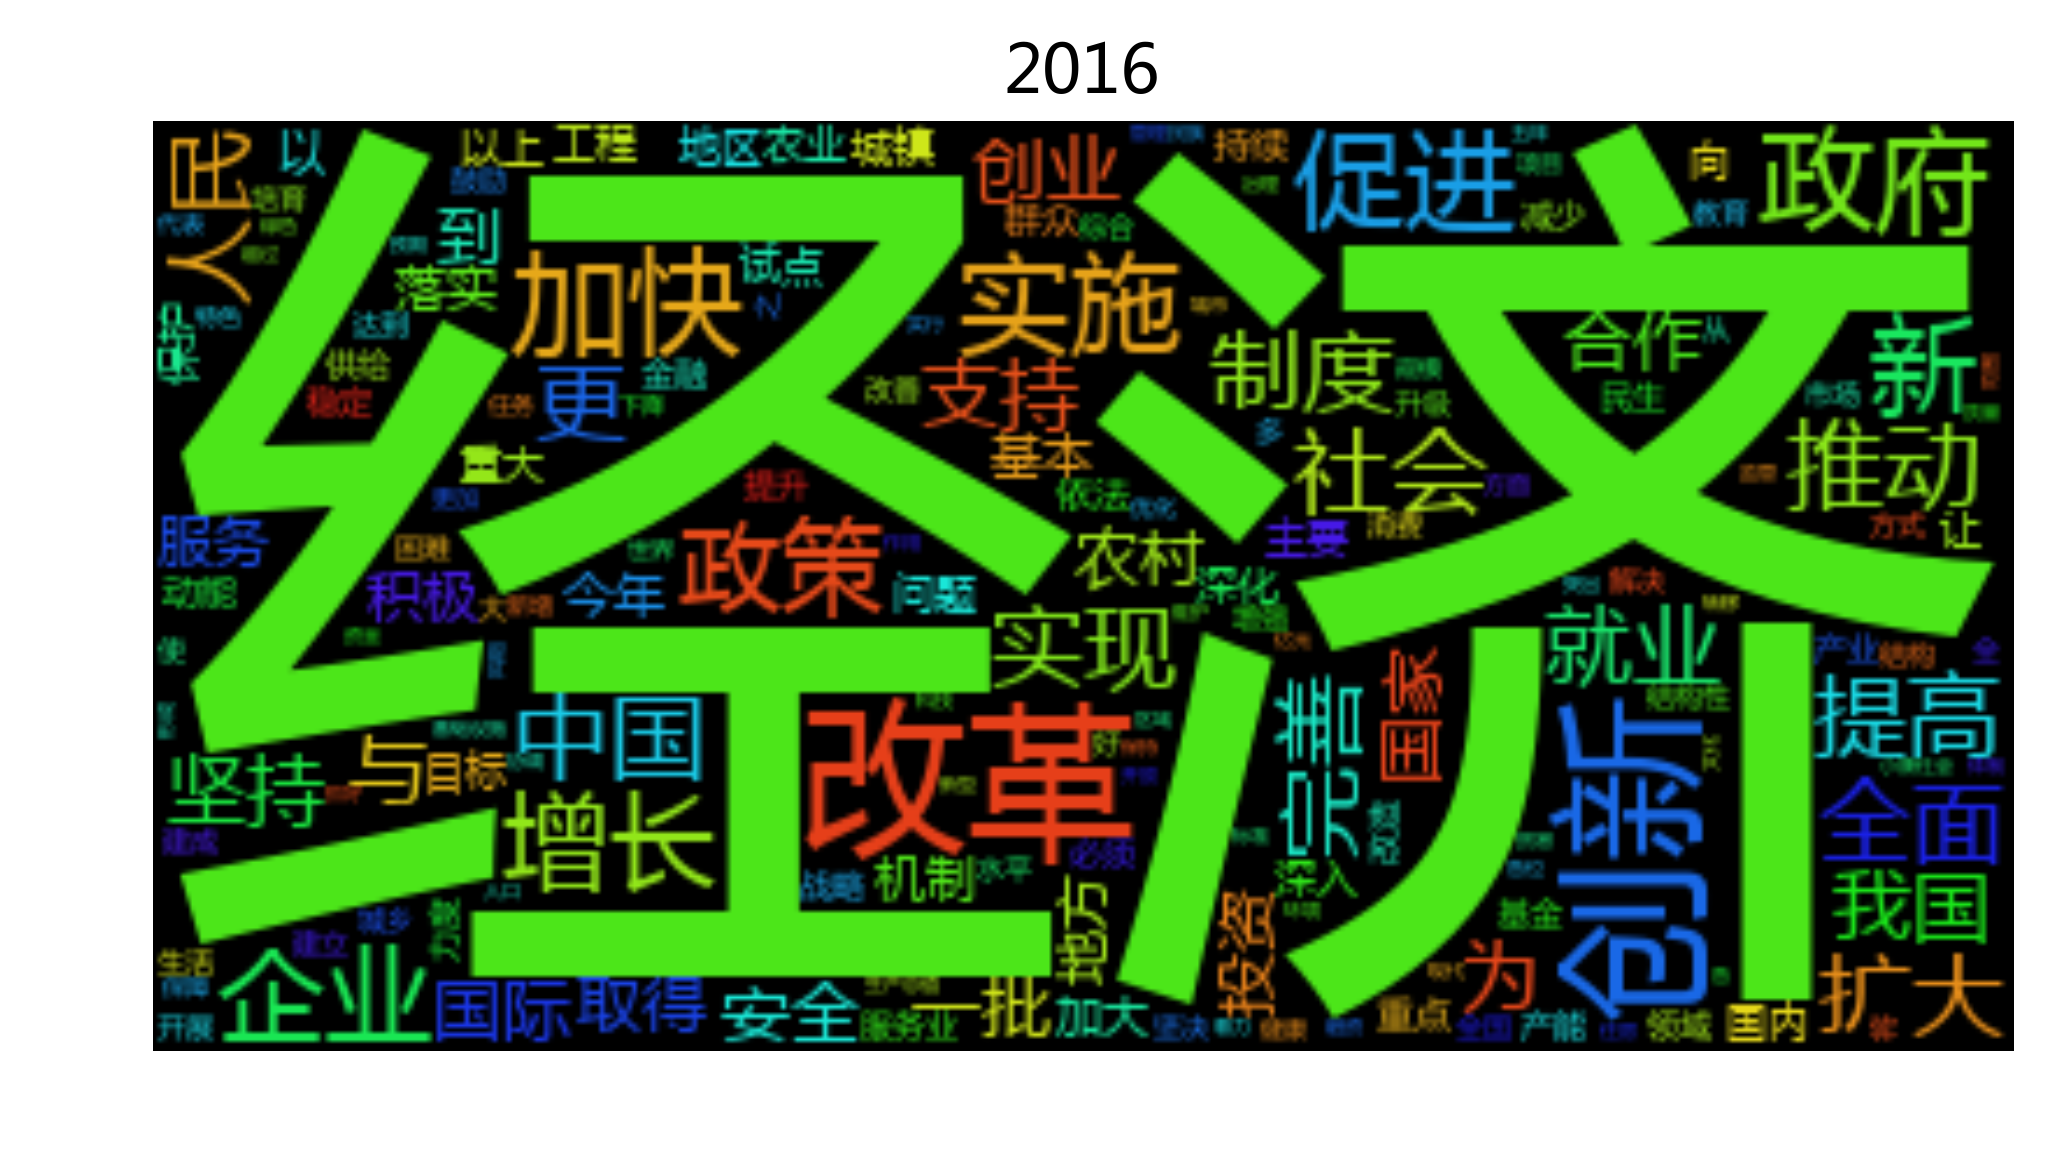

In [113]:
#jieba.add_word('股灾', freq=100, tag=None) 

for txt in reports[-2:]:
    seg_list = jieba.cut(txt, cut_all=False)
    seg_list = [i for i in seg_list if i not in stopwords]
    txt = r' '.join(seg_list)
    wordcloudplot(txt, txt[:4]) 
    file_path = '/Users/chengjun/GitHub/cjc2016/figure/wordcloud-' + txt[:4] + '.png'
    plt.savefig(file_path,dpi = 400, bbox_inches="tight",transparent = True)


In [31]:
import jieba.analyse
a = jieba.analyse.extract_tags(txt, topK=20, withWeight=False)
for i in a: print i

人民
我们
国家
我国
一九五三年
工业
一九五四年
必须
工作
建设
发展
和平
一九四九年
社会主义
一九五
国家机关
生产
计划
全国
农业


In [73]:
topwords = jieba.analyse.textrank(txt,topK=20, withWeight=False)
for i in topwords:print i

农业
发展
纲要
全国
生产
实现
农村
要求
建设
方面
食堂
达到
农民
基本
使
到
消灭
人民
群众
提前
